# Income Age 2021

In [21]:
# Dependencies
import requests
import pandas as pd
from census import Census
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2021
)

In [23]:
# Run Census Search to retrieve data on all states (2021 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19049_001E",
        "B19049_002E",
        "B19049_003E",
        "B19049_004E",
        "B19049_005E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
income_age_2021 = pd.DataFrame(census_data)

# Column renaming
income_age_2021 = income_age_2021.rename(
    columns = {
        "B19049_001E": "Household Income Total",
        "B19049_002E": "Household Income Under 25 years",
        "B19049_003E": "Household Income 25 to 44 years",
        "B19049_004E": "Household Income 45 to 64 years",
        "B19049_005E": "Household Income 65 years and over",
        "NAME": "Name"
    }
)

# Configure the final DataFrame
income_age_2021 = income_age_2021[
    [
        "Name",
        "Household Income Total",
        "Household Income Under 25 years",
        "Household Income 25 to 44 years",
        "Household Income 45 to 64 years",
        "Household Income 65 years and over"
    ]
]
# Rename name to state
income_age_2021 = income_age_2021.rename(columns={"Name":"State"})

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(income_age_2021)}")
income_age_2021

Number of rows in the DataFrame: 52


,State,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Alabama,54943.0,27050.0,59945.0,66253.0,42673.0
1,Alaska,80287.0,44078.0,86218.0,95393.0,62935.0
2,Arizona,65913.0,39880.0,72443.0,79030.0,52250.0
3,Arkansas,52123.0,31919.0,58410.0,60778.0,40259.0
4,California,84097.0,44205.0,90138.0,98785.0,60832.0
5,Colorado,80184.0,43365.0,87239.0,96439.0,58270.0
6,Connecticut,83572.0,42038.0,87411.0,104155.0,60256.0
7,Delaware,72724.0,36302.0,74893.0,86798.0,60631.0
8,District of Columbia,93547.0,46853.0,109135.0,97226.0,64232.0
9,Florida,61777.0,36500.0,66433.0,72740.0,49257.0


In [24]:
# Read in the housing listing prices to compare to income by age
listing_prices = pd.read_csv("output_data/Median Listing Prices.csv")
listing_prices

,Unnamed: 0,State,Year_Month_2019,Median Listing Price_2019,Year_Month_2020,Median Listing Price_2020,Year_Month_2021,Median Listing Price_2021
0,0,Pennsylvania,201912,219400.0,202012,259900.0,202112,250000.0
1,1,Utah,201912,412000.0,202012,531450.0,202112,588225.0
2,2,New York,201912,462450.0,202012,569000.0,202112,549945.0
3,3,Colorado,201912,473014.0,202012,510500.0,202112,549500.0
4,4,West Virginia,201912,161000.0,202012,165000.0,202112,175000.0
5,5,Florida,201912,329995.0,202012,342250.0,202112,414950.0
6,6,Wyoming,201912,266500.0,202012,265000.0,202112,325000.0
7,7,Minnesota,201912,279900.0,202012,299650.0,202112,320000.0
8,8,Kansas,201912,179950.0,202012,195125.0,202112,212500.0
9,9,Virginia,201912,316225.0,202012,344995.0,202112,366975.0


In [25]:
income_age = pd.merge(income_age_2021, listing_prices, on=('State'), how='right')

income_age = income_age[["State",
                         "Year_Month_2021",
                         "Median Listing Price_2021",
                         "Household Income Total",
                         "Household Income Under 25 years",
                         "Household Income 25 to 44 years",
                         "Household Income 45 to 64 years",
                         "Household Income 65 years and over"
                        ]]

income_age["Median Listing Price_2021"] = income_age["Median Listing Price_2021"].map("${:,.2f}".format)
income_age["Household Income Total"] = income_age["Household Income Total"].map("${:,.2f}".format)
income_age["Household Income Under 25 years"] = income_age["Household Income Under 25 years"].map("${:,.2f}".format)
income_age["Household Income 25 to 44 years"] = income_age["Household Income 25 to 44 years"].map("${:,.2f}".format)
income_age["Household Income 45 to 64 years"] = income_age["Household Income 45 to 64 years"].map("${:,.2f}".format)
income_age["Household Income 65 years and over"] = income_age["Household Income 65 years and over"].map("${:,.2f}".format)

income_age

,State,Year_Month_2021,Median Listing Price_2021,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Pennsylvania,202112,"$250,000.00","$67,587.00","$35,924.00","$77,704.00","$82,539.00","$47,153.00"
1,Utah,202112,"$588,225.00","$79,133.00","$43,564.00","$83,643.00","$99,306.00","$59,518.00"
2,New York,202112,"$549,945.00","$75,157.00","$39,366.00","$85,570.00","$88,827.00","$51,837.00"
3,Colorado,202112,"$549,500.00","$80,184.00","$43,365.00","$87,239.00","$96,439.00","$58,270.00"
4,West Virginia,202112,"$175,000.00","$50,884.00","$27,814.00","$59,761.00","$59,223.00","$40,256.00"
5,Florida,202112,"$414,950.00","$61,777.00","$36,500.00","$66,433.00","$72,740.00","$49,257.00"
6,Wyoming,202112,"$325,000.00","$68,002.00","$32,895.00","$77,657.00","$81,693.00","$50,854.00"
7,Minnesota,202112,"$320,000.00","$77,706.00","$42,756.00","$88,800.00","$94,880.00","$52,710.00"
8,Kansas,202112,"$212,500.00","$64,521.00","$35,320.00","$71,976.00","$78,885.00","$49,216.00"
9,Virginia,202112,"$366,975.00","$80,615.00","$40,953.00","$86,973.00","$99,057.00","$57,591.00"


In [26]:
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = income_age[income_age["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2021,Median Listing Price_2021,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
2,New York,202112,"$549,945.00","$75,157.00","$39,366.00","$85,570.00","$88,827.00","$51,837.00"
5,Florida,202112,"$414,950.00","$61,777.00","$36,500.00","$66,433.00","$72,740.00","$49,257.00"
12,California,202112,"$692,928.00","$84,097.00","$44,205.00","$90,138.00","$98,785.00","$60,832.00"
20,Illinois,202112,"$257,000.00","$72,563.00","$34,424.00","$80,059.00","$87,986.00","$51,237.00"
34,Texas,202112,"$345,500.00","$67,321.00","$35,115.00","$72,082.00","$80,762.00","$49,599.00"


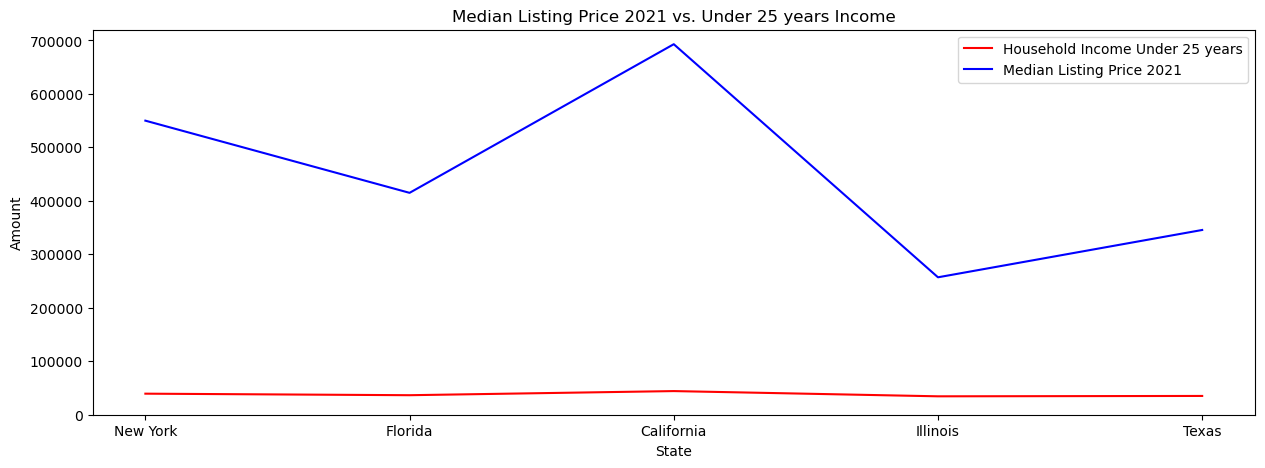

In [27]:
# Plot the difference between house listings and income by age
x_value = selected_housing['State']
selected_housing["Median Listing Price_2021"] = selected_housing["Median Listing Price_2021"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2021']
x_value2 = selected_housing['State']
selected_housing["Household Income Under 25 years"] = selected_housing["Household Income Under 25 years"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Household Income Under 25 years']
plt.plot(x_value2,y_value2, color="red", label="Household Income Under 25 years")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2021")
plt.title("Median Listing Price 2021 vs. Under 25 years Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig14.png")
plt.show()

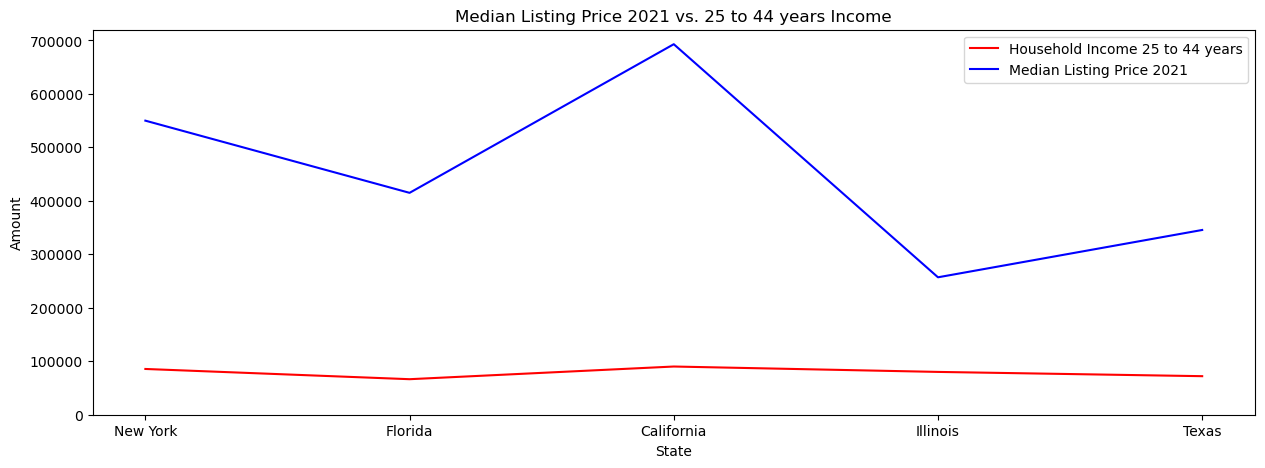

In [28]:
# Plot the difference between house listings and income by age
x_value = selected_housing['State']
selected_housing["Median Listing Price_2021"] = selected_housing["Median Listing Price_2021"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2021']
x_value2 = selected_housing['State']
selected_housing["Household Income 25 to 44 years"] = selected_housing["Household Income 25 to 44 years"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Household Income 25 to 44 years']
plt.plot(x_value2,y_value2, color="red", label="Household Income 25 to 44 years")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2021")
plt.title("Median Listing Price 2021 vs. 25 to 44 years Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig5.png")
plt.show()